# Psyduck is asking a question: How to predict sale price???

In [81]:
from IPython.display import Image
remote_image = Image(url='https://hk.portal-pokemon.com/play/resources/pokedex/img/pm/0783062d0d860b8ae7d8e859241a700359c4d981.png')
# display the remote image in jupyter notebook.
display(remote_image)

# 1. Data Preparation
## 1.1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import dataset
train = pd.read_csv(r'C:\Users\user\Desktop\Data_Science\House_Prices\train.csv')
test = pd.read_csv(r'C:\Users\user\Desktop\Data_Science\House_Prices\test.csv')

## 1.2. Data Exploration

In [2]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


Train data include 1460 rows and 80 features + 1 column (house price)

Test dara include 1459 rows and 80 features, house price unknown

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Target variable

In [4]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

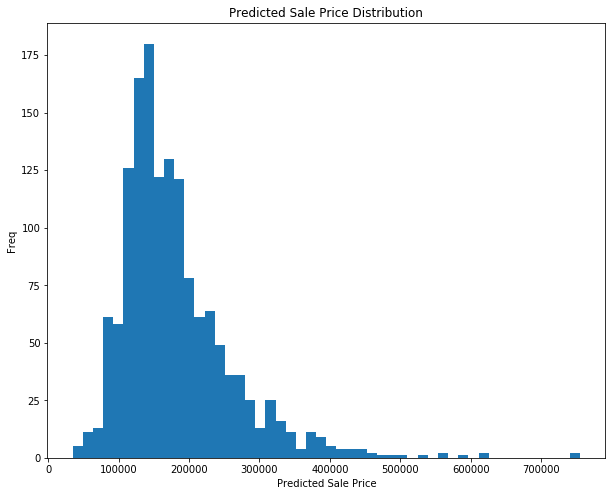

In [75]:
plt.figure(figsize=(10,8))
plt.hist(train['SalePrice'], bins=50)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Freq')
plt.title('Predicted Sale Price Distribution')

plt.show()

# 2. Data Pre-Processing
## Combining Dataset (All_data = train + test)

For convenience of data pre-precessing, merge train & test data.

In [5]:
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train.SalePrice.values

all_data = pd.concat((train, test),sort=True).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

all_data.shape

(2919, 80)

## 2.1. Drop "ID"

In [6]:
# 1 refer to axis=1 (column)
all_data = all_data.drop('Id', 1)

## 2.2. Imputation of Missing Values
### 2.2.1. Numeric Variables

There are 36 Numeric Variables

In [7]:
numeric_features = all_data.select_dtypes(include=[np.number])
print(numeric_features.columns)
len(numeric_features.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')


36

## Count the number of missing value in 36 numeric variables (exclude sale price)

In [8]:
nulls = pd.DataFrame(numeric_features.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'

y_pos = np.arange(len(nulls))

plt.figure(figsize=(10,8))
plt.barh(y_pos, nulls['Null Count'], align='center', alpha=0.5)
plt.yticks(y_pos, nulls.index)
plt.xlabel('number of missing value')
plt.title('number of missing value in 36 numeric variables')

plt.show()

<Figure size 1000x800 with 1 Axes>

##  Multivariate Feature Imputation (Numeric Variables)
https://scikit-learn.org/stable/modules/impute.html

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(numeric_features)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, tol=0.001, verbose=0)

## After imputation, there are no missing value in numeric variables


In [10]:
numeric_features_filled = imp.transform(numeric_features)
# convert numpy array to dataframe
numeric_features_filled = pd.DataFrame(data = numeric_features_filled,columns = numeric_features.columns)

numeric_features_filled.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFullBath     0
BsmtHalfBath     0
BsmtUnfSF        0
EnclosedPorch    0
Fireplaces       0
FullBath         0
GarageArea       0
GarageCars       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
KitchenAbvGr     0
LotArea          0
LotFrontage      0
LowQualFinSF     0
MSSubClass       0
MasVnrArea       0
MiscVal          0
MoSold           0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PoolArea         0
ScreenPorch      0
TotRmsAbvGrd     0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
YrSold           0
dtype: int64

### 2.2.2.  Category Variables
There are 43 category variables

In [11]:
categorical_features = all_data.select_dtypes(exclude=[np.number])
print(categorical_features.columns)
len(categorical_features.columns)

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')


43

## Count the number of missing value in 43 category variables

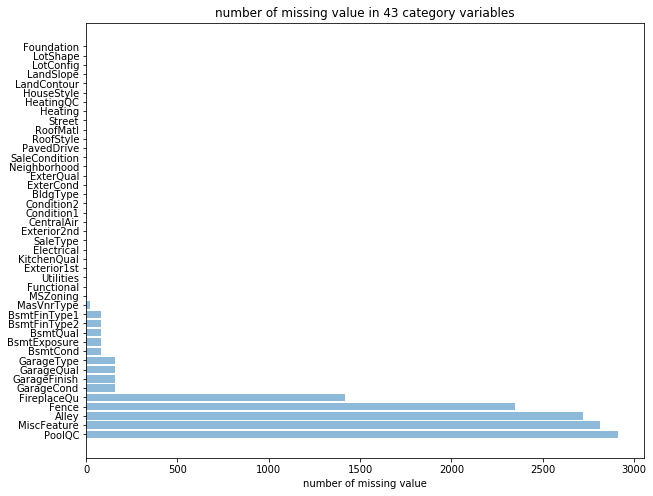

In [12]:
nulls = pd.DataFrame(categorical_features.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'

y_pos = np.arange(len(nulls))

plt.figure(figsize=(10,8))
plt.barh(y_pos, nulls['Null Count'], align='center', alpha=0.5)
plt.yticks(y_pos, nulls.index)
plt.xlabel('number of missing value')
plt.title('number of missing value in 43 category variables')

plt.show()

In [13]:
# make a copy
categorical_features_filled = categorical_features.copy()

## Fill missing value with "None"

In [14]:
categorical_features_filled["PoolQC"] = categorical_features_filled["PoolQC"].fillna("None")
categorical_features_filled["MiscFeature"] = categorical_features_filled["MiscFeature"].fillna("None")
categorical_features_filled["Alley"] = categorical_features_filled["Alley"].fillna("None")
categorical_features_filled["Fence"] = categorical_features_filled["Fence"].fillna("None")
categorical_features_filled["FireplaceQu"] = categorical_features_filled["FireplaceQu"].fillna("None")

## Fill other category variable with its own most frequent value

In [15]:
categorical_features_filled = categorical_features_filled.apply(lambda x:x.fillna(x.value_counts().index[0]))

## After imputation, there are no missing value in category variables

In [16]:
categorical_features_filled.isnull().sum()

Alley            0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtQual         0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Foundation       0
Functional       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig        0
LotShape         0
MSZoning         0
MasVnrType       0
MiscFeature      0
Neighborhood     0
PavedDrive       0
PoolQC           0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
Street           0
Utilities        0
dtype: int64

# 3. Feature Engineering
## 3.1. One-Hot Encoding for Category Variables

one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

Note that drop first level of each categorical variable to avoid multicollinearity.

In [17]:
from sklearn.preprocessing import OneHotEncoder

# convert to string
categorical_features_filled = categorical_features_filled.apply(lambda x:x.astype(str))

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="error",drop='first',sparse = False)
encoder.fit(categorical_features_filled)   

# Apply the encoder.
categorical_features_encoded = encoder.transform(categorical_features_filled)

# convert to dataframe
categorical_features_encoded_df = pd.DataFrame(categorical_features_encoded)

categorical_features_encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Merge 'numeric_features_filled' & 'categorical_features_encoded_df'
## It is processed data

In [18]:
all_data_processed = pd.concat([numeric_features_filled, categorical_features_encoded_df], axis=1)
all_data_processed.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,204,205,206,207,208,209,210,211,212,213
0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,272.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Split to train data & test data

In [19]:
train_processed = all_data_processed[:ntrain]
test_processed = all_data_processed[ntrain:]

#  4. Lasso Regression Model

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

## 4.1. Cross-Validation

https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833

The data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

## 4.2. Grid Search of Model Parameter

Try a list of alpha: 2^k where k from 1 to 11

Notice that as the alpha value increases, more features have a coefficient of 0 which is variable selection function.

## 4.3. Model Selection Criteria: R-square

In [54]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

X = train_processed
y = y_train

# 5 fold cross-validation
kF = KFold(n_splits=5, random_state=1234)

# Grid search
param_grid = [{'alpha': [2**1,2**2,2**3,2**4,2**5,2**6,2**7,2**8,2**9,2**10,2**11]}]

# lasso
lasso = Lasso(max_iter=1000,tol=100)

# 
clf = GridSearchCV(lasso, param_grid, cv=kF, scoring = 'r2').fit(X, y)

clf.score(X, y)

0.815025795782309

## 4.4. Model Summary

In [55]:
clf.cv_results_

{'mean_fit_time': array([0.01653051, 0.01602931, 0.01562152, 0.00312419, 0.00937147,
        0.01594362, 0.0152844 , 0.01563449, 0.01561337, 0.0168879 ,
        0.01520877]),
 'std_fit_time': array([1.71605195e-03, 2.08566979e-03, 2.11865999e-05, 6.24837875e-03,
        7.65177474e-03, 6.04992143e-04, 6.45020231e-03, 2.89811096e-05,
        1.13136085e-05, 3.58893684e-03, 2.99552250e-03]),
 'mean_score_time': array([0.00350065, 0.00080166, 0.        , 0.00937295, 0.00624852,
        0.        , 0.00157194, 0.00312252, 0.        , 0.00239305,
        0.00319133]),
 'std_score_time': array([0.00212843, 0.00160332, 0.        , 0.00765298, 0.00765285,
        0.        , 0.00079074, 0.00624504, 0.        , 0.00195396,
        0.00159574]),
 'param_alpha': masked_array(data=[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),


## By result of grid search across 5-fold cross-validation, the best alpha = 256

In [56]:
clf.best_estimator_

Lasso(alpha=256, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=100, warm_start=False)

Text(0.5, 1.0, 'Grid Search Result')

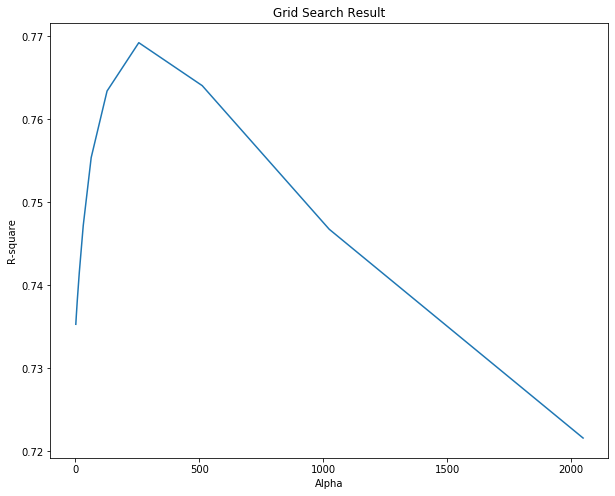

In [64]:
plt.figure(figsize=(10,8))
plt.plot((2**1,2**2,2**3,2**4,2**5,2**6,2**7,2**8,2**9,2**10,2**11),clf.cv_results_['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R-square')
plt.title('Grid Search Result')

plt.show()

## When alpha = 256, 107 out of 250 features being selected

In [61]:
sum(clf.best_estimator_.coef_!=0)

107

## 4.5. Apply Lasso Model in Test Data

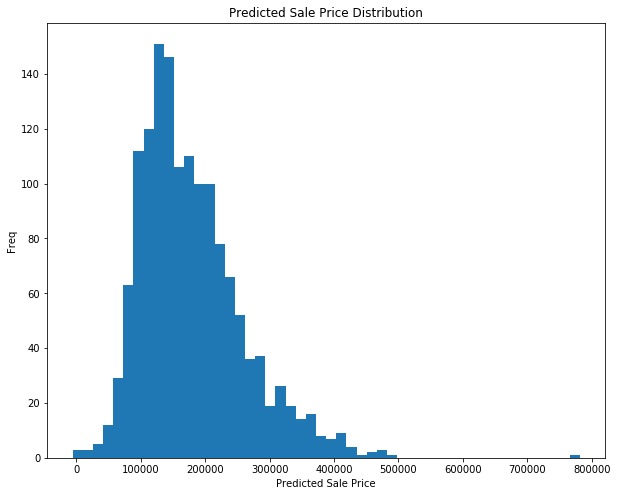

In [72]:
test_predict = clf.predict(test_processed)

plt.figure(figsize=(10,8))
plt.hist(test_predict, bins=50)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Freq')
plt.title('Predicted Sale Price Distribution')

plt.show()

# 5. Submission

In [74]:
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = test_predict
sub.to_csv('submission.csv',index=False)